In [1]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('LandTrading.csv')
df

,Unnamed: 0,dien_tich,huong_ban_cong,phong_ngu,id_thanh_pho,ten_thanh_pho,id_quan,ten_quan,so_tang,mat_tien,...,gia,gia_m2,du_an,project_name,id_duong,ten_duong,do_rong_duong,do_rong_duong_ml,id_phuong,ten_phuong
0,0,220.0,NaN,1.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,1.0,NaN,...,30000.0,136.363636,NaN,NaN,5e958ee8208d0d6d7648f9cc,Phố Linh Lang,10.0,Ngõ 4 ô tô tránh,5e5501cbeb80a7245175e0e4,Phường Cống Vị
1,1,500.0,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,NaN,NaN,...,195000.0,390.000000,NaN,NaN,5e958ee8208d0d6d7648f96d,Đường Cao Bá Quát,40.0,Ngõ 4 ô tô trở lên,5e5501cbeb80a7245175e0e9,Phường Điện Biên
2,2,154.0,NaN,1.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,1.0,NaN,...,40000.0,259.740260,NaN,NaN,5e958ee8208d0d6d7648f978,Đường Đội Cấn,20.0,Ngõ 4 ô tô trở lên,5e5501cbeb80a7245175e0ea,Phường Đội Cấn
3,3,116.0,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,NaN,NaN,...,14300.0,123.275862,NaN,NaN,5e958ee8208d0d6d7648f974,Đường Đào Tấn,8.0,Ngõ 3 ô tô tránh,5e5501cbeb80a7245175e0e4,Phường Cống Vị
4,4,195.0,NaN,1.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,1.0,NaN,...,26500.0,135.897436,NaN,NaN,5e958ee8208d0d6d7648f97a,Đường Giang Văn Minh,100.0,Ngõ 4 ô tô trở lên,5e5501cbeb80a7245175e0ec,Phường Kim Mã
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27249,27249,72.0,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175dedd,Huyện Phú Xuyên,NaN,NaN,...,670.0,9.305556,NaN,NaN,NaN,NaN,NaN,NaN,5e5501cceb80a7245175e2e5,Xã Hoàng Long
27250,27250,90.0,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175dedd,Huyện Phú Xuyên,NaN,NaN,...,800.0,8.888889,NaN,NaN,5e958eef208d0d6d76490f18,Đường Quốc lộ 1A,NaN,NaN,5e5501cceb80a7245175e2e4,Xã Hồng Thái
27251,27251,100.0,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175dedd,Huyện Phú Xuyên,NaN,8.0,...,NaN,NaN,NaN,NaN,5e958eef208d0d6d76490f1c,Đường Tỉnh lộ 428,NaN,NaN,5e5501cceb80a7245175e2ed,Xã Phúc Tiến
27252,27252,100.0,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175dedd,Huyện Phú Xuyên,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5e5501cceb80a7245175e2db,Thị trấn Phú Xuyên


In [2]:
# Xử lí dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27254 entries, 0 to 27253
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        27254 non-null  int64  
 1   dien_tich         26962 non-null  float64
 2   huong_ban_cong    102 non-null    object 
 3   phong_ngu         1077 non-null   float64
 4   id_thanh_pho      27254 non-null  object 
 5   ten_thanh_pho     27254 non-null  object 
 6   id_quan           27254 non-null  object 
 7   ten_quan          27254 non-null  object 
 8   so_tang           1283 non-null   float64
 9   mat_tien          13055 non-null  float64
 10  noi_that          166 non-null    object 
 11  huong_nha         8611 non-null   object 
 12  so_do             14688 non-null  object 
 13  lat               27223 non-null  float64
 14  long              27223 non-null  float64
 15  gia               22967 non-null  float64
 16  gia_m2            22979 non-null  float6

In [3]:
df.describe()

,Unnamed: 0,dien_tich,phong_ngu,so_tang,mat_tien,lat,long,gia,gia_m2,do_rong_duong
count,27254.000000,2.696200e+04,1077.000000,1283.000000,13055.000000,27223.000000,27223.000000,2.296700e+04,2.297900e+04,3468.000000
mean,13626.500000,1.342902e+05,2.397400,2.649260,10.964998,21.008271,105.772617,7.726914e+08,1.909441e+07,8.319738
std,7867.696454,1.099229e+07,3.704954,5.376624,34.008165,0.459544,0.168104,9.418448e+10,1.827735e+09,10.482400
min,0.000000,1.100000e-01,1.000000,1.000000,1.000000,9.174539,103.949177,3.650000e-04,4.055556e-07,1.000000
25%,6813.250000,5.000000e+01,1.000000,1.000000,4.100000,20.984005,105.713834,1.674000e+03,2.100000e+01,3.500000
50%,13626.500000,7.400000e+01,1.000000,1.000000,5.000000,21.027957,105.796203,3.075000e+03,4.571429e+01,5.000000
75%,20439.750000,1.250000e+02,3.000000,4.000000,8.000000,21.064319,105.877472,6.000000e+03,7.500000e+01,10.000000
max,27253.000000,9.071686e+08,58.000000,158.000000,920.000000,22.047809,109.212781,1.400000e+13,2.296000e+11,312.000000


In [4]:
df.dtypes

Unnamed: 0            int64
dien_tich           float64
huong_ban_cong       object
phong_ngu           float64
id_thanh_pho         object
ten_thanh_pho        object
id_quan              object
ten_quan             object
so_tang             float64
mat_tien            float64
noi_that             object
huong_nha            object
so_do                object
lat                 float64
long                float64
gia                 float64
gia_m2              float64
du_an                object
project_name         object
id_duong             object
ten_duong            object
do_rong_duong       float64
do_rong_duong_ml     object
id_phuong            object
ten_phuong           object
dtype: object

In [6]:
def get_index_remove(df, column):
    data = df[column].values

    upper_quartile = np.percentile(data, 75)
    lower_quartile = np.percentile(data, 25)

    iqr = upper_quartile - lower_quartile
    lower_value = lower_quartile-1.5*iqr
    upper_value = upper_quartile+1.5*iqr


    index = []
    lower_idx =  df[df[column]<=lower_value].index
    index.extend(lower_idx)

    upper_idx =  df[df[column]>=upper_value].index
    index.extend(upper_idx)
    return index

print(df.columns)

Index(['Unnamed: 0', 'dien_tich', 'huong_ban_cong', 'phong_ngu',
       'id_thanh_pho', 'ten_thanh_pho', 'id_quan', 'ten_quan', 'so_tang',
       'mat_tien', 'noi_that', 'huong_nha', 'so_do', 'lat', 'long', 'gia',
       'gia_m2', 'du_an', 'project_name', 'id_duong', 'ten_duong',
       'do_rong_duong', 'do_rong_duong_ml', 'id_phuong', 'ten_phuong'],
      dtype='object')


In [7]:
    # heatmap
    # correlation
corr = df.corr()
print(corr)
features = ['dien_tich','mat_tien','lat', 'long','gia_m2']

               Unnamed: 0  dien_tich  phong_ngu   so_tang  mat_tien       lat  \
Unnamed: 0       1.000000   0.001578   0.058098  0.028987 -0.026733  0.022172   
dien_tich        0.001578   1.000000   0.021374 -0.007769 -0.001844  0.000822   
phong_ngu        0.058098   0.021374   1.000000  0.659985  0.036975  0.054598   
so_tang          0.028987  -0.007769   0.659985  1.000000 -0.056192  0.031788   
mat_tien        -0.026733  -0.001844   0.036975 -0.056192  1.000000 -0.003293   
lat              0.022172   0.000822   0.054598  0.031788 -0.003293  1.000000   
long             0.477423   0.008371   0.011392 -0.037609 -0.073206 -0.376675   
gia             -0.012531  -0.000109  -0.005028  0.008733 -0.000490 -0.000402   
gia_m2          -0.005866  -0.000138  -0.018879  0.017125 -0.000966  0.000148   
do_rong_duong   -0.052150  -0.008941  -0.083771  0.053455  0.116038 -0.009457   

                   long       gia    gia_m2  do_rong_duong  
Unnamed: 0     0.477423 -0.012531 -0.005866    

In [8]:
df_merge = pd.DataFrame()
# from scratch 
target = df[df["id_quan"]=="5e5501caeb80a7245175de1a"].reset_index(drop=True)
# group theo duong 
df_group = target.groupby("id_duong")


for street_name, street_df in df_group:
    mean =  street_df["do_rong_duong"].mean()
    if not pd.isna(mean):
        # tim tat ca nhung row ma bi khuyet thieu cai gia tri do rong duong
        mask = street_df["do_rong_duong"].isna()
        street_df[mask]["do_rong_duong"] = mean
        df_merge = pd.concat([df_merge, street_df], axis=0)
    # break
print(len(target["do_rong_duong"].isna().index))
print("*"*30)
print(len(df_merge["do_rong_duong"].isna().index))

274
******************************
155


C:\Users\TANPHA~1\AppData\Local\Temp/ipykernel_13696/229268831.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  street_df[mask]["do_rong_duong"] = mean


In [9]:
# xlnl
target_df = df[features]
# Thong ke nullable

target_df = target_df.dropna().reset_index(drop=True)
list_index_remove = []
for col in features:
    outlier = get_index_remove(target_df,col)
    list_index_remove.extend(outlier)

print("length of list index outlier: ",len(list_index_remove))

length of list index outlier:  4743


In [10]:
clean_df = target_df.drop(list_index_remove, axis=0).reset_index(drop=True)
clean_df

      dien_tich  mat_tien        lat        long      gia_m2
0          50.0       4.0  21.029740  105.811109  150.000000
1          50.0       5.0  21.032037  105.826725   61.000000
2         130.0      12.6  21.035336  105.823893  103.846154
3          44.8       6.0  21.024298  105.814838   89.285714
4          66.2       4.0  21.041734  105.806519  140.483384
...         ...       ...        ...         ...         ...
7676       67.0       5.0  21.152058  105.754108   20.000000
7677      126.0       5.0  21.175343  105.730805   23.000000
7678       44.0       4.3  21.139488  105.740407   13.000000
7679       99.0       6.3  21.158006  105.764810   28.500000
7680       88.0       5.5  21.168425  105.741163   43.000000

[7681 rows x 5 columns]


In [12]:
# Xay mo hinh
# Lay du lieu + normalizer
x_columns = ['dien_tich','mat_tien','lat', 'long']
y_columns = ['gia_m2']

X = clean_df[x_columns].values
y = clean_df[y_columns].values

# scaler = MinMaxScaler()
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.25)
# Training mo hinh
# 75% training
model = LinearRegression()
model.fit(X_train, y_train)
print(model.coef_)

# tunining hyper parmeters ?? grid search ->>  chon model moi tot ho: another model ->>

# benchmark -> metrics: SME, r2 -->
# 25% test
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_absolute_error(y_test, y_pred)

print("r2 score: ", r2)
print("mse score: ", mse)

# du doan
input_x = np.array([56,6,21.33,105.79]).reshape(1, -1)
price_m2_x = model.predict(input_x)
print(price_m2_x)

[[ 1.81562944e-02  2.27011901e+00 -5.99912875e+00  9.10611689e+01]]
r2 score:  0.12366310526780588
mse score:  23.50218115630369
[[53.75324865]]


In [13]:
X = df.drop(["gia_m2"],axis=1)
y = df["gia_m2"]

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2)
train_data = X_train.join(y_train)

In [14]:
train_data

,Unnamed: 0,dien_tich,huong_ban_cong,phong_ngu,id_thanh_pho,ten_thanh_pho,id_quan,ten_quan,so_tang,mat_tien,...,gia,du_an,project_name,id_duong,ten_duong,do_rong_duong,do_rong_duong_ml,id_phuong,ten_phuong,gia_m2
8584,8584,720.0,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de22,Huyện Thạch Thất,NaN,NaN,...,NaN,NaN,NaN,5e958eef208d0d6d76490ead,Đường 446,NaN,NaN,5e5501cceb80a7245175e273,Xã Tiến Xuân,NaN
8064,8064,75.0,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de22,Huyện Thạch Thất,NaN,7.2,...,1704.0,NaN,NaN,5e958eef208d0d6d76490eb6,Đường Đại lộ Thăng Long,NaN,NaN,5e5501cceb80a7245175e273,Xã Tiến Xuân,22.720000
9834,9834,75.0,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de23,Huyện Chương Mỹ,NaN,29.0,...,NaN,NaN,NaN,5e958eef208d0d6d76490ee2,Đường Hồ Chí Minh,NaN,NaN,5e5501cceb80a7245175e291,Xã Thủy Xuân Tiên,NaN
6000,6000,44.0,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de20,Huyện Hoài Đức,NaN,NaN,...,1276.0,NaN,NaN,5e958eef208d0d6d76490e57,Đường Liên Xã,NaN,NaN,5e5501cceb80a7245175e258,Xã An Thượng,29.000000
5856,5856,33.4,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de20,Huyện Hoài Đức,NaN,5.0,...,1568.0,NaN,NaN,5e958eef208d0d6d76490e46,Đường 32,NaN,NaN,5e5501cceb80a7245175e24f,Xã Kim Chung,45.748503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25408,25408,32.0,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de34,Huyện Thanh Trì,NaN,3.5,...,1024.0,NaN,NaN,5e958eeb208d0d6d76490126,Đường Ngọc Hồi,NaN,NaN,5e5501cbeb80a7245175e1be,Xã Ngọc Hồi,32.000000
16895,16895,136.0,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de2b,Quận Cầu Giấy,NaN,9.3,...,42500.0,NaN,NaN,5e958eea208d0d6d7648fd64,Phố Trung Kính,NaN,NaN,NaN,NaN,312.500000
16115,16115,76.0,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de2a,Quận Long Biên,NaN,NaN,...,10700.0,NaN,NaN,NaN,NaN,NaN,NaN,5e5501cbeb80a7245175e10d,Phường Việt Hưng,140.789474
21674,21674,51.0,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de32,Huyện Gia Lâm,NaN,NaN,...,2100.0,NaN,NaN,5e958eeb208d0d6d76490015,Đường Ngô Xuân Quảng,NaN,NaN,5e5501cbeb80a7245175e1a0,Thị trấn Trâu Quỳ,41.176471


array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'dien_tich'}>,
        <AxesSubplot:title={'center':'phong_ngu'}>],
       [<AxesSubplot:title={'center':'so_tang'}>,
        <AxesSubplot:title={'center':'mat_tien'}>,
        <AxesSubplot:title={'center':'lat'}>],
       [<AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'gia'}>,
        <AxesSubplot:title={'center':'do_rong_duong'}>],
       [<AxesSubplot:title={'center':'gia_m2'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

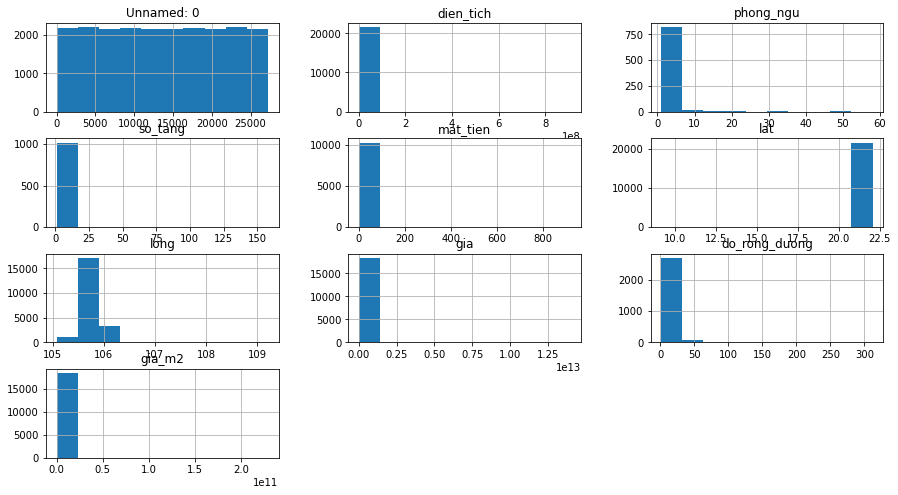

In [15]:
train_data.hist(figsize=(15,8))

In [16]:
train_data.corr

<bound method DataFrame.corr of        Unnamed: 0  dien_tich huong_ban_cong  phong_ngu  \
8584         8584      720.0            NaN        NaN   
8064         8064       75.0            NaN        NaN   
9834         9834       75.0            NaN        NaN   
6000         6000       44.0            NaN        NaN   
5856         5856       33.4            NaN        NaN   
...           ...        ...            ...        ...   
25408       25408       32.0            NaN        NaN   
16895       16895      136.0            NaN        NaN   
16115       16115       76.0            NaN        NaN   
21674       21674       51.0            NaN        NaN   
6010         6010       38.5            NaN        3.0   

                   id_thanh_pho     ten_thanh_pho                   id_quan  \
8584   5e5501caeb80a7245175dddb  Thành phố Hà Nội  5e5501caeb80a7245175de22   
8064   5e5501caeb80a7245175dddb  Thành phố Hà Nội  5e5501caeb80a7245175de22   
9834   5e5501caeb80a7245175dddb  T

<AxesSubplot:>

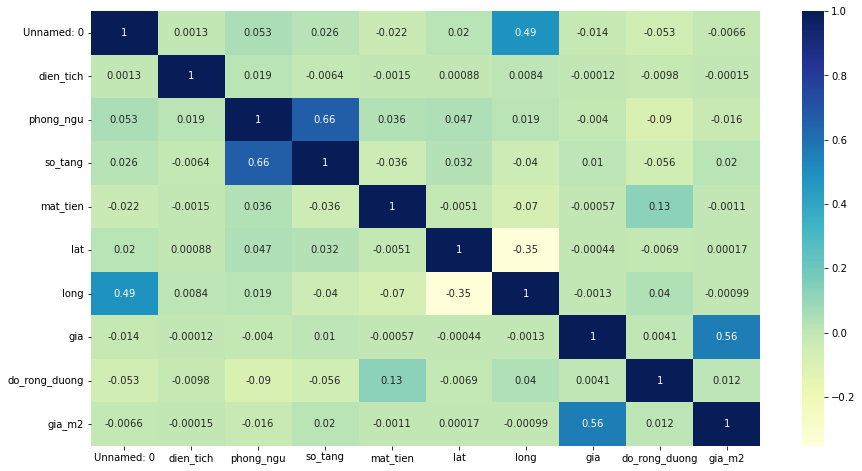

In [17]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot = True, cmap="YlGnBu")

In [18]:
train_data['dien_tich'] = np.log(train_data['dien_tich'] +1)
train_data['mat_tien'] = np.log(train_data['mat_tien'] +1)
train_data['lat'] = np.log(train_data['lat'] +1)
train_data['gia_m2'] = np.log(train_data['gia_m2'] +1)

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'dien_tich'}>,
        <AxesSubplot:title={'center':'phong_ngu'}>],
       [<AxesSubplot:title={'center':'so_tang'}>,
        <AxesSubplot:title={'center':'mat_tien'}>,
        <AxesSubplot:title={'center':'lat'}>],
       [<AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'gia'}>,
        <AxesSubplot:title={'center':'do_rong_duong'}>],
       [<AxesSubplot:title={'center':'gia_m2'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

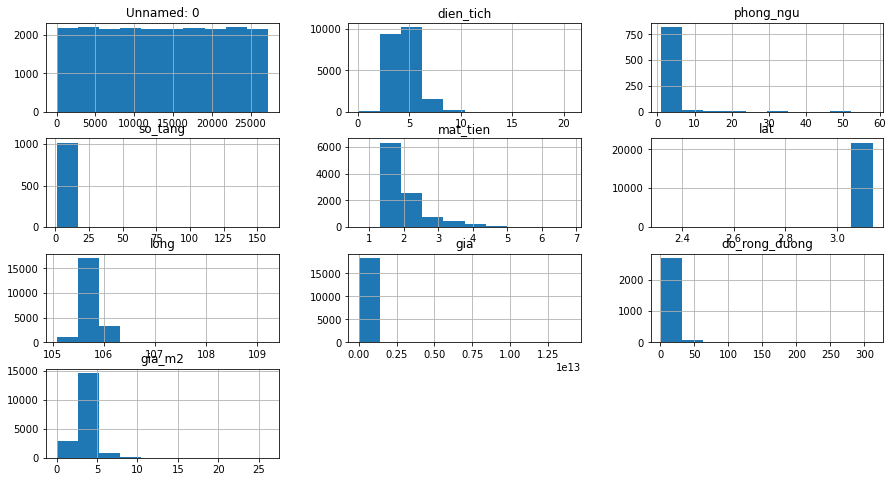

In [19]:
train_data.hist(figsize=(15,8))

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(X = "latitude", Y = "longitude", df = train_data, hue='.....', palatte = "coolwarm")